In [225]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [226]:
import numpy as np
import pandas as pd

In [227]:
car_frame = pd.read_csv("CarPrice_Assignment.csv")


#data prep and cleaning
car_frame = car_frame.assign(company = car_frame['CarName'].str.split(' ').str[0])
car_frame = car_frame.assign(cararea = car_frame['carlength']*car_frame['carwidth'])
car_frame = car_frame.assign(mpg = (car_frame['highwaympg']+car_frame['citympg'])/2 )


car_frame.head()

car_frame = car_frame.set_index("car_ID")

In [228]:
car_frame.isnull().values.any() #checkingfor any nullvalues

False

In [229]:
car_frame['company'] = car_frame['company'].replace(['maxda','mazda'],'mazda')
car_frame['company'] = car_frame['company'].replace(['nissan','Nissan'],'nissan')
car_frame['company'] = car_frame['company'].replace(['porsche','porcshce'],'porsche')
car_frame['company'] = car_frame['company'].replace(['vokswagen','vw', 'volkswagen'],'volkswagen')
car_frame['company'] = car_frame['company'].replace(['toyota','toyouta'],'toyota')

car_frame.company.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

car_ID
47    spfi
Name: fuelsystem, dtype: object

In [233]:
import matplotlib.pyplot as plt
import seaborn as sns

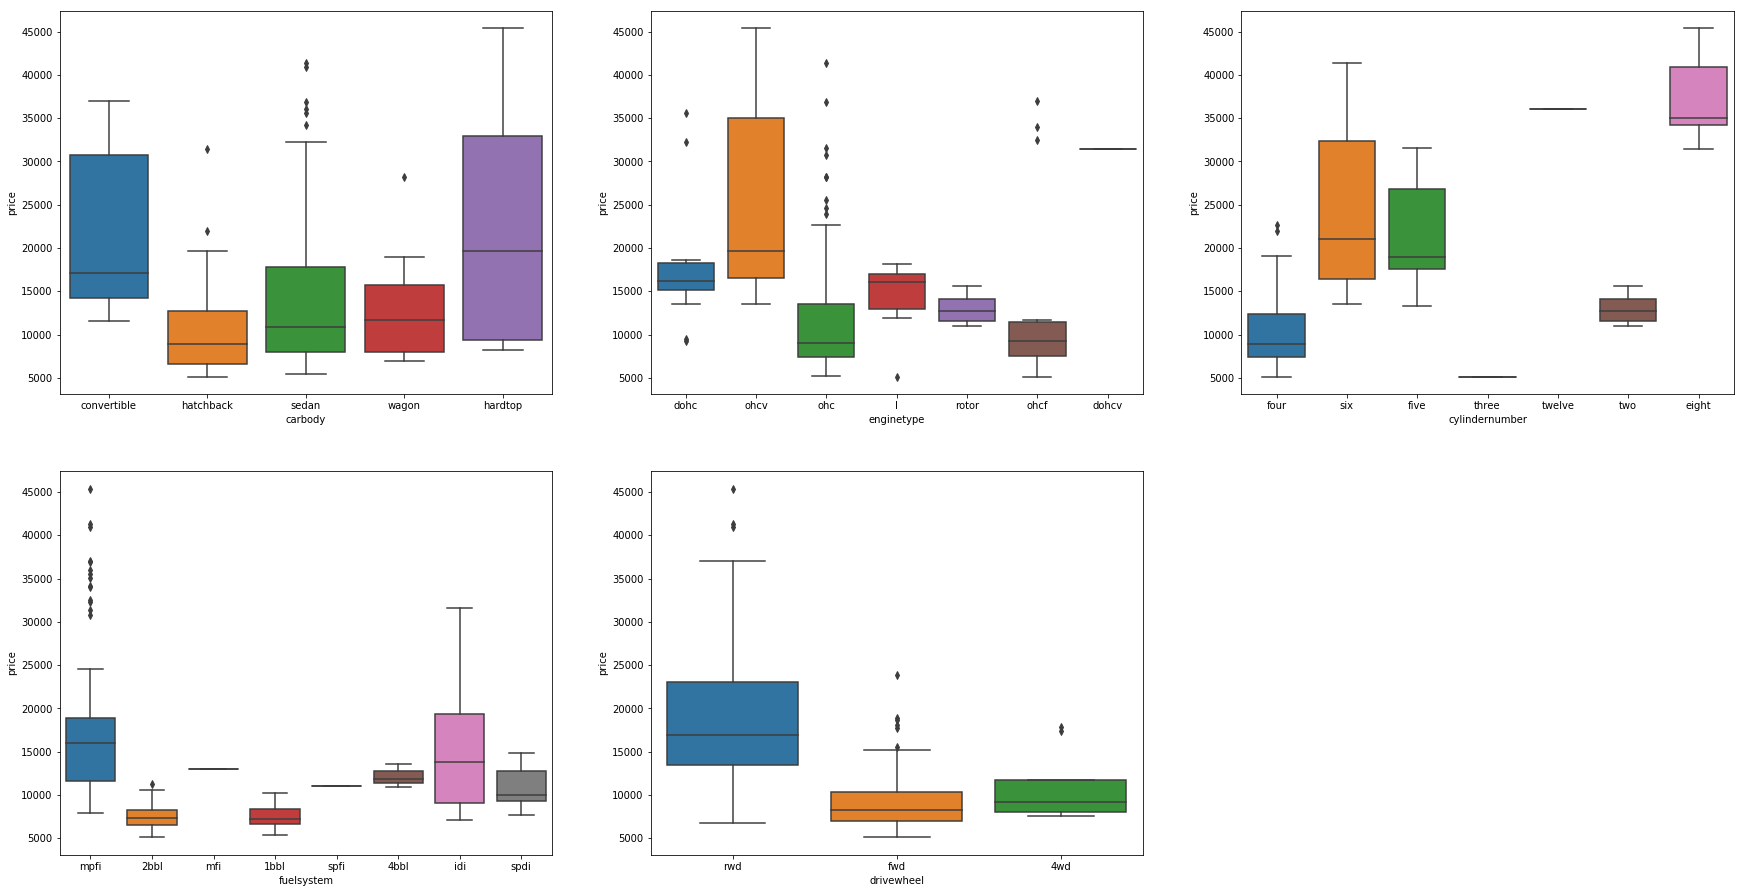

In [235]:

plt.figure(figsize=(30, 24))
plt.subplot(3,3,1)
sns.boxplot(x = 'carbody', y = 'price', data = car_frame)
plt.subplot(3,3,2)
sns.boxplot(x = 'enginetype', y = 'price', data = car_frame)
plt.subplot(3,3,3)
sns.boxplot(x = 'cylindernumber', y = 'price', data = car_frame)
plt.subplot(3,3,4)
sns.boxplot(x = 'fuelsystem', y = 'price', data = car_frame)
plt.subplot(3,3,5)
sns.boxplot(x = 'drivewheel', y = 'price', data = car_frame)
#plt.subplot(3,3,6)
#sns.boxplot(x = 'company', y = 'price', data = car_frame)
plt.show()

In [236]:
varlist =  ['enginelocation', 'fueltype', "doornumber", "aspiration"]

# Defining the map function
def data_map(x):
    return x.map({'front': 1, "rear": 0, "gas" : 0, "diesel" : 1, "two" : 0, "four" : 1, "std": 0, "turbo" : 1})

# Applying the function to the carframe list
car_frame[varlist] = car_frame[varlist].apply(data_map)


In [237]:
car_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 1 to 205
Data columns (total 28 columns):
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null int64
aspiration          205 non-null int64
doornumber          205 non-null int64
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null int64
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg          

In [238]:
varlist = ['carbody', 'enginetype', 'cylindernumber', 'fuelsystem', 'drivewheel', 'company']

#getting dummy values
for val in varlist:
    status = pd.get_dummies(car_frame[val], drop_first = True, dtype="int")
    car_frame = pd.concat([car_frame, status], axis = 1)
    
car_frame.drop(varlist, axis = 1, inplace = True)    
car_frame.head()

,symboling,CarName,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,0,0,0,1,88.6,168.8,64.1,48.8,...,0,0,0,0,0,0,0,0,0,0
2,3,alfa-romero stelvio,0,0,0,1,88.6,168.8,64.1,48.8,...,0,0,0,0,0,0,0,0,0,0
3,1,alfa-romero Quadrifoglio,0,0,0,1,94.5,171.2,65.5,52.4,...,0,0,0,0,0,0,0,0,0,0
4,2,audi 100 ls,0,0,1,1,99.8,176.6,66.2,54.3,...,0,0,0,0,0,0,0,0,0,0
5,2,audi 100ls,0,0,1,1,99.4,176.6,66.4,54.3,...,0,0,0,0,0,0,0,0,0,0


In [239]:

car_frame = car_frame.drop(['carlength', 'carwidth', 'citympg', 'highwaympg', 'CarName'], axis=1)
car_frame.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 1 to 205
Data columns (total 63 columns):
symboling           205 non-null int64
fueltype            205 non-null int64
aspiration          205 non-null int64
doornumber          205 non-null int64
enginelocation      205 non-null int64
wheelbase           205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginesize          205 non-null int64
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
price               205 non-null float64
cararea             205 non-null float64
mpg                 205 non-null float64
hardtop             205 non-null int32
hatchback           205 non-null int32
sedan               205 non-null int32
wagon               205 non-null int32
dohcv               205 non-null int32
l                   2

In [240]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(car_frame, train_size = 0.7, test_size = 0.3, random_state = 100)

In [241]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [242]:
num_vars = ['symboling','wheelbase','cararea','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','mpg','price']


In [243]:
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carheight,curbweight,enginesize,boreratio,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
car_ID,,,,,,,,,,,,,,,,,,,,,
123,0.6,0,0,1,1,0.244828,0.265487,0.272692,0.139623,0.230159,...,0,0,1,0,0,0,0,0,0,0
126,1.0,0,0,0,1,0.272414,0.212389,0.500388,0.339623,1.000000,...,0,0,0,1,0,0,0,0,0,0
167,0.6,0,0,0,1,0.272414,0.424779,0.314973,0.139623,0.444444,...,0,0,0,0,0,0,0,1,0,0
2,1.0,0,0,0,1,0.068966,0.088496,0.411171,0.260377,0.626984,...,0,0,0,0,0,0,0,0,0,0
200,0.2,0,1,1,1,0.610345,0.858407,0.647401,0.260377,0.746032,...,0,0,0,0,0,0,0,0,0,1


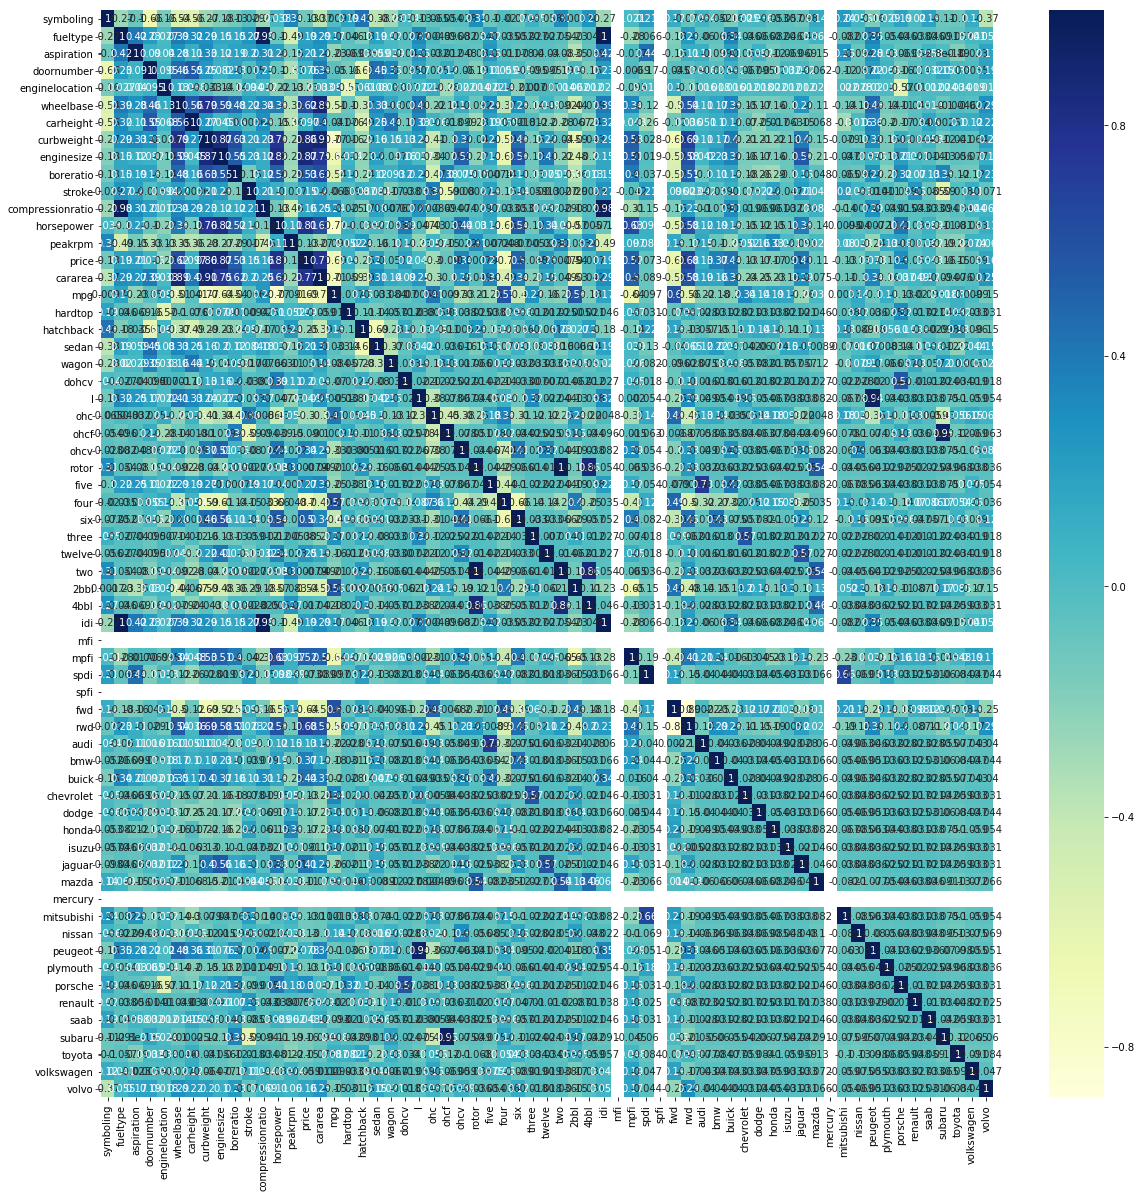

In [244]:
plt.figure(figsize = (20, 20))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

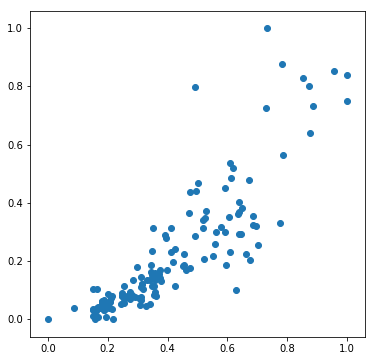

In [245]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.curbweight, df_train.price)
plt.show()

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [246]:
y_train = df_train.pop('price')
X_train = df_train

In [247]:

# Add a constant
#based on assumption
X_train_lm = sm.add_constant(X_train[[ 'curbweight', 'horsepower',  'enginelocation', 'bmw','buick', 'porsche', 'wagon']])
# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [248]:
lr.params

const             0.182285
curbweight        0.584056
horsepower        0.301515
enginelocation   -0.284462
bmw               0.254875
buick             0.218076
porsche           0.129377
wagon            -0.062425
dtype: float64

In [249]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     185.1
Date:                Sun, 10 Feb 2019   Prob (F-statistic):           5.99e-66
Time:                        02:40:53   Log-Likelihood:                 185.72
No. Observations:                 143   AIC:                            -355.4
Df Residuals:                     135   BIC:                            -331.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1823      0.084      2.

In [251]:
def calculateVIF(xt):
    vif = pd.DataFrame()
    vif['Features'] = xt.columns
    vif['VIF'] = [variance_inflation_factor(xt.values, i) for i in range(xt.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [ ]:
# training the model starts

In [252]:
X_train_lm1 = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm1).fit()

print(lr_1.summary())
calculateVIF(X_train)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     55.88
Date:                Sun, 10 Feb 2019   Prob (F-statistic):           9.44e-50
Time:                        02:40:56   Log-Likelihood:                 273.81
No. Observations:                 143   AIC:                            -435.6
Df Residuals:                      87   BIC:                            -269.7
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.2797      0.171  

,Features,VIF
29,three,inf
53,peugeot,inf
25,rotor,inf
21,l,inf
34,idi,inf
31,two,inf
1,fueltype,inf
4,enginelocation,2702.770000
27,four,455.220000
58,subaru,408.650000


In [253]:
calculateVIF(X_train)

,Features,VIF
29,three,inf
53,peugeot,inf
25,rotor,inf
21,l,inf
34,idi,inf
31,two,inf
1,fueltype,inf
4,enginelocation,2702.770000
27,four,455.220000
58,subaru,408.650000


In [254]:
X = X_train.drop('three', 1)

X_train_lm2 = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm2).fit()

#print(lr_2.summary())

In [255]:
calculateVIF(X)

,Features,VIF
33,idi,inf
25,rotor,inf
30,two,inf
1,fueltype,inf
4,enginelocation,2702.770000
27,four,455.220000
57,subaru,408.650000
8,enginesize,347.130000
11,compressionratio,287.760000
23,ohcf,277.200000


In [256]:
X = X.drop('idi', 1)

X_train_lm3 = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm3).fit()

#print(lr_3.summary())
calculateVIF(X)

,Features,VIF
25,rotor,inf
30,two,inf
4,enginelocation,2702.770000
27,four,455.220000
56,subaru,408.650000
8,enginesize,347.130000
1,fueltype,305.110000
11,compressionratio,287.760000
23,ohcf,277.200000
21,l,170.190000


In [257]:
X = X.drop('rotor', 1)

X_train_lm4 = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_lm4).fit()

calculateVIF(X)

,Features,VIF
4,enginelocation,2702.77
26,four,455.22
55,subaru,408.65
8,enginesize,347.13
1,fueltype,305.11
11,compressionratio,287.76
23,ohcf,277.20
21,l,170.19
50,peugeot,120.96
29,two,101.33


In [258]:
X = X.drop('enginelocation', 1)

X_train_lm5 = sm.add_constant(X)

lr_5 = sm.OLS(y_train, X_train_lm5).fit()

calculateVIF(X)

,Features,VIF
25,four,507.88
7,enginesize,487.36
10,compressionratio,469.38
1,fueltype,334.40
6,curbweight,259.54
8,boreratio,246.72
13,cararea,241.55
11,horsepower,217.63
9,stroke,145.46
4,wheelbase,128.00


In [259]:
X = X.drop('four', 1)

X_train_lm6 = sm.add_constant(X)

lr_6 = sm.OLS(y_train, X_train_lm6).fit()

calculateVIF(X)

,Features,VIF
10,compressionratio,459.64
1,fueltype,333.74
7,enginesize,320.66
6,curbweight,249.32
13,cararea,239.93
11,horsepower,216.82
9,stroke,133.90
4,wheelbase,127.88
8,boreratio,112.60
31,mpfi,71.62


In [260]:
X = X.drop('compressionratio', 1)

X_train_lm7 = sm.add_constant(X)

lr_7 = sm.OLS(y_train, X_train_lm7).fit()

calculateVIF(X)

,Features,VIF
7,enginesize,320.49
6,curbweight,236.47
12,cararea,233.20
10,horsepower,172.14
9,stroke,131.74
4,wheelbase,127.85
8,boreratio,112.58
30,mpfi,67.35
16,sedan,64.93
20,ohc,60.64


In [261]:
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     54.42
Date:                Sun, 10 Feb 2019   Prob (F-statistic):           6.19e-50
Time:                        02:41:07   Log-Likelihood:                 267.83
No. Observations:                 143   AIC:                            -427.7
Df Residuals:                      89   BIC:                            -267.7
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1051      0.109     -0.967      0.3

In [262]:
X = X.drop('enginesize', 1)

X_train_lm8 = sm.add_constant(X)

lr_8 = sm.OLS(y_train, X_train_lm8).fit()
print(lr_8.summary())
calculateVIF(X)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     45.16
Date:                Sun, 10 Feb 2019   Prob (F-statistic):           8.60e-47
Time:                        02:41:07   Log-Likelihood:                 252.84
No. Observations:                 143   AIC:                            -399.7
Df Residuals:                      90   BIC:                            -242.6
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0151      0.118     -0.128      0.8

,Features,VIF
11,cararea,232.62
6,curbweight,215.54
9,horsepower,134.06
4,wheelbase,127.77
8,stroke,118.03
7,boreratio,82.04
15,sedan,64.04
29,mpfi,63.94
19,ohc,60.59
51,subaru,54.23


In [263]:
X = X.drop('cararea', 1)

X_train_lm9 = sm.add_constant(X)

lr_9 = sm.OLS(y_train, X_train_lm9).fit()
print(lr_9.summary())
calculateVIF(X)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     46.55
Date:                Sun, 10 Feb 2019   Prob (F-statistic):           1.25e-47
Time:                        02:41:07   Log-Likelihood:                 252.84
No. Observations:                 143   AIC:                            -401.7
Df Residuals:                      91   BIC:                            -247.6
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0150      0.117     -0.128      0.8

,Features,VIF
6,curbweight,163.69
9,horsepower,132.91
8,stroke,118.01
7,boreratio,81.23
4,wheelbase,74.20
28,mpfi,63.88
14,sedan,62.76
18,ohc,60.53
50,subaru,53.03
5,carheight,47.30


In [264]:
X = X.drop('curbweight', 1)

X_train_lm10 = sm.add_constant(X)

lr_10 = sm.OLS(y_train, X_train_lm10).fit()

print(lr_10.summary())
calculateVIF(X)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     41.19
Date:                Sun, 10 Feb 2019   Prob (F-statistic):           1.35e-45
Time:                        02:41:08   Log-Likelihood:                 242.32
No. Observations:                 143   AIC:                            -382.6
Df Residuals:                      92   BIC:                            -231.5
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1220      0.120      1.021      0.3

,Features,VIF
7,stroke,116.94
8,horsepower,105.71
6,boreratio,71.02
4,wheelbase,68.77
13,sedan,61.57
27,mpfi,61.17
17,ohc,56.70
49,subaru,52.61
10,mpg,46.47
5,carheight,44.74


In [265]:
X = X.drop('stroke', 1)

X_train_lm11 = sm.add_constant(X)

lr_11 = sm.OLS(y_train, X_train_lm11).fit()

print(lr_11.summary())
calculateVIF(X)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     42.41
Date:                Sun, 10 Feb 2019   Prob (F-statistic):           2.21e-46
Time:                        02:41:08   Log-Likelihood:                 242.20
No. Observations:                 143   AIC:                            -384.4
Df Residuals:                      93   BIC:                            -236.3
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1155      0.118      0.980      0.3

,Features,VIF
7,horsepower,87.86
6,boreratio,70.17
4,wheelbase,68.05
26,mpfi,60.38
12,sedan,59.53
48,subaru,52.51
16,ohc,49.27
9,mpg,46.47
17,ohcf,42.77
5,carheight,41.18


In [266]:
X = X.drop('horsepower', 1)

X_train_lm12 = sm.add_constant(X)

lr_12 = sm.OLS(y_train, X_train_lm12).fit()

print(lr_12.summary())
calculateVIF(X)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     32.47
Date:                Sun, 10 Feb 2019   Prob (F-statistic):           1.45e-41
Time:                        02:41:09   Log-Likelihood:                 221.93
No. Observations:                 143   AIC:                            -345.9
Df Residuals:                      94   BIC:                            -200.7
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1343      0.135      0.994      0.3

,Features,VIF
4,wheelbase,68.04
11,sedan,59.25
25,mpfi,53.08
15,ohc,48.97
47,subaru,48.47
6,boreratio,47.04
8,mpg,45.09
16,ohcf,42.19
5,carheight,40.87
10,hatchback,39.51


In [267]:
X = X.drop('wheelbase', 1)

X_train_lm13 = sm.add_constant(X)

lr_13 = sm.OLS(y_train, X_train_lm13).fit()

print(lr_13.summary())
calculateVIF(X)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     27.38
Date:                Sun, 10 Feb 2019   Prob (F-statistic):           1.53e-38
Time:                        02:41:09   Log-Likelihood:                 208.38
No. Observations:                 143   AIC:                            -320.8
Df Residuals:                      95   BIC:                            -178.5
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1350      0.148      0.914      0.3

,Features,VIF
10,sedan,52.99
24,mpfi,50.54
14,ohc,48.83
5,boreratio,46.00
46,subaru,44.91
7,mpg,39.03
15,ohcf,38.44
4,carheight,37.29
21,2bbl,36.38
9,hatchback,34.19


In [268]:
X = X.drop('sedan', 1)

X_train_lm14 = sm.add_constant(X)

lr_14 = sm.OLS(y_train, X_train_lm14).fit()

print(lr_14.summary())
calculateVIF(X)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     27.88
Date:                Sun, 10 Feb 2019   Prob (F-statistic):           5.18e-39
Time:                        02:41:09   Log-Likelihood:                 207.46
No. Observations:                 143   AIC:                            -320.9
Df Residuals:                      96   BIC:                            -181.7
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1438      0.148      0.974      0.3

,Features,VIF
23,mpfi,48.77
13,ohc,47.12
5,boreratio,45.75
45,subaru,40.29
14,ohcf,38.41
7,mpg,37.51
4,carheight,35.53
20,2bbl,34.68
0,symboling,25.79
40,peugeot,22.28


In [269]:
X = X.drop('mpfi', 1)

X_train_lm15 = sm.add_constant(X)

lr_15 = sm.OLS(y_train, X_train_lm15).fit()

print(lr_15.summary())
calculateVIF(X)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     28.79
Date:                Sun, 10 Feb 2019   Prob (F-statistic):           9.72e-40
Time:                        02:41:10   Log-Likelihood:                 207.44
No. Observations:                 143   AIC:                            -322.9
Df Residuals:                      97   BIC:                            -186.6
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1626      0.104      1.561      0.1

,Features,VIF
13,ohc,43.20
44,subaru,40.27
5,boreratio,38.91
14,ohcf,38.26
7,mpg,35.88
4,carheight,35.27
0,symboling,24.40
39,peugeot,22.26
12,l,20.46
26,rwd,20.12


In [270]:
X = X.drop('ohc', 1)

X_train_lm16 = sm.add_constant(X)

lr_16 = sm.OLS(y_train, X_train_lm16).fit()

print(lr_16.summary())
calculateVIF(X)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     29.22
Date:                Sun, 10 Feb 2019   Prob (F-statistic):           3.91e-40
Time:                        02:41:10   Log-Likelihood:                 206.24
No. Observations:                 143   AIC:                            -322.5
Df Residuals:                      98   BIC:                            -189.1
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2170      0.095      2.274      0.0

,Features,VIF
43,subaru,39.65
5,boreratio,38.81
13,ohcf,36.04
7,mpg,35.30
4,carheight,31.79
0,symboling,24.25
25,rwd,20.05
38,peugeot,19.69
24,fwd,17.88
6,peakrpm,16.96


In [271]:
X = X.drop('subaru', 1)

X_train_lm17 = sm.add_constant(X)

lr_17 = sm.OLS(y_train, X_train_lm17).fit()

print(lr_17.summary())
calculateVIF(X)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     27.82
Date:                Sun, 10 Feb 2019   Prob (F-statistic):           2.71e-39
Time:                        02:41:10   Log-Likelihood:                 200.79
No. Observations:                 143   AIC:                            -313.6
Df Residuals:                      99   BIC:                            -183.2
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1951      0.098      1.985      0.0

,Features,VIF
7,mpg,34.70
5,boreratio,34.58
4,carheight,31.69
0,symboling,24.25
25,rwd,20.00
38,peugeot,19.04
24,fwd,17.84
6,peakrpm,16.96
12,l,14.53
43,toyota,11.35


In [272]:
X = X.drop('mpg', 1)

X_train_lm18 = sm.add_constant(X)

lr_18 = sm.OLS(y_train, X_train_lm18).fit()

print(lr_18.summary())
calculateVIF(X)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     27.84
Date:                Sun, 10 Feb 2019   Prob (F-statistic):           2.17e-39
Time:                        02:41:11   Log-Likelihood:                 198.62
No. Observations:                 143   AIC:                            -311.2
Df Residuals:                     100   BIC:                            -183.8
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1066      0.085      1.253      0.2

,Features,VIF
4,carheight,30.97
5,boreratio,29.80
0,symboling,20.78
24,rwd,18.98
37,peugeot,18.96
6,peakrpm,16.90
23,fwd,15.13
11,l,14.20
42,toyota,9.79
36,nissan,7.97


In [273]:
X = X.drop('carheight', 1)

X_train_lm19 = sm.add_constant(X)

lr_19 = sm.OLS(y_train, X_train_lm19).fit()

print(lr_19.summary())
calculateVIF(X)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     28.03
Date:                Sun, 10 Feb 2019   Prob (F-statistic):           1.36e-39
Time:                        02:41:11   Log-Likelihood:                 196.84
No. Observations:                 143   AIC:                            -309.7
Df Residuals:                     101   BIC:                            -185.2
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0406      0.075      0.542      0.5

,Features,VIF
4,boreratio,29.75
0,symboling,20.77
23,rwd,18.87
36,peugeot,17.87
5,peakrpm,16.54
22,fwd,15.11
10,l,13.99
41,toyota,7.25
11,ohcf,7.23
35,nissan,7.05


In [274]:
X = X.drop('boreratio', 1)

X_train_lm20 = sm.add_constant(X)

lr_20 = sm.OLS(y_train, X_train_lm20).fit()

print(lr_20.summary())
calculateVIF(X)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     24.87
Date:                Sun, 10 Feb 2019   Prob (F-statistic):           2.56e-37
Time:                        02:41:11   Log-Likelihood:                 186.77
No. Observations:                 143   AIC:                            -291.5
Df Residuals:                     102   BIC:                            -170.1
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1234      0.077      1.610      0.1

,Features,VIF
0,symboling,19.67
35,peugeot,16.72
4,peakrpm,16.11
22,rwd,15.22
21,fwd,14.69
9,l,13.90
3,doornumber,6.62
12,five,6.12
40,toyota,6.06
23,audi,5.82


In [275]:
X = X.drop('symboling', 1)

X_train_lm21 = sm.add_constant(X)

lr_21 = sm.OLS(y_train, X_train_lm21).fit()

print(lr_21.summary())
calculateVIF(X)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     25.75
Date:                Sun, 10 Feb 2019   Prob (F-statistic):           5.02e-38
Time:                        02:41:12   Log-Likelihood:                 186.76
No. Observations:                 143   AIC:                            -293.5
Df Residuals:                     103   BIC:                            -175.0
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1192      0.066      1.810      0.0

,Features,VIF
34,peugeot,16.52
3,peakrpm,15.77
8,l,13.74
20,fwd,13.24
21,rwd,10.51
2,doornumber,5.98
39,toyota,5.90
11,five,5.88
33,nissan,5.52
32,mitsubishi,5.32


In [276]:
X = X.drop('peugeot', 1)

X_train_lm22 = sm.add_constant(X)

lr_22 = sm.OLS(y_train, X_train_lm22).fit()

print(lr_22.summary())
calculateVIF(X)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     26.66
Date:                Sun, 10 Feb 2019   Prob (F-statistic):           9.97e-39
Time:                        02:41:12   Log-Likelihood:                 186.71
No. Observations:                 143   AIC:                            -295.4
Df Residuals:                     104   BIC:                            -179.9
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1219      0.065      1.880      0.0

,Features,VIF
3,peakrpm,15.45
20,fwd,12.94
21,rwd,9.78
11,five,5.82
2,doornumber,5.66
38,toyota,5.31
14,two,5.26
33,nissan,5.11
32,mitsubishi,5.01
15,2bbl,4.82


In [277]:
X = X.drop('peakrpm', 1)

X_train_lm23 = sm.add_constant(X)

lr_23 = sm.OLS(y_train, X_train_lm23).fit()

print(lr_23.summary())
calculateVIF(X)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     27.22
Date:                Sun, 10 Feb 2019   Prob (F-statistic):           3.84e-39
Time:                        02:41:12   Log-Likelihood:                 185.70
No. Observations:                 143   AIC:                            -295.4
Df Residuals:                     105   BIC:                            -182.8
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1428      0.063      2.279      0.0

,Features,VIF
19,fwd,12.58
20,rwd,8.00
10,five,5.77
2,doornumber,5.63
13,two,5.13
37,toyota,4.86
14,2bbl,4.80
21,audi,4.29
29,mazda,4.22
31,mitsubishi,4.17


In [278]:
X = X.drop('fwd', 1)

X_train_lm24 = sm.add_constant(X)

lr_24 = sm.OLS(y_train, X_train_lm24).fit()

print(lr_24.summary())
calculateVIF(X)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     28.24
Date:                Sun, 10 Feb 2019   Prob (F-statistic):           7.16e-40
Time:                        02:41:13   Log-Likelihood:                 185.69
No. Observations:                 143   AIC:                            -297.4
Df Residuals:                     106   BIC:                            -187.8
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1448      0.053      2.739      0.0

,Features,VIF
19,rwd,5.81
10,five,5.77
2,doornumber,5.49
13,two,5.07
14,2bbl,4.74
20,audi,4.08
15,4bbl,4.00
11,six,3.94
4,hatchback,3.90
36,toyota,3.83


In [279]:
X = X.drop('rwd', 1)

X_train_lm25 = sm.add_constant(X)

lr_25 = sm.OLS(y_train, X_train_lm25).fit()

print(lr_25.summary())
calculateVIF(X)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     28.03
Date:                Sun, 10 Feb 2019   Prob (F-statistic):           1.08e-39
Time:                        02:41:13   Log-Likelihood:                 182.77
No. Observations:                 143   AIC:                            -293.5
Df Residuals:                     107   BIC:                            -186.9
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2158      0.041      5.226      0.0

,Features,VIF
10,five,5.76
2,doornumber,5.44
13,two,4.84
14,2bbl,4.58
19,audi,4.08
15,4bbl,4.00
4,hatchback,3.90
11,six,3.62
35,toyota,3.38
9,ohcv,3.37


In [280]:
X = X.drop('five', 1)

X_train_lm26 = sm.add_constant(X)

lr_26 = sm.OLS(y_train, X_train_lm26).fit()

print(lr_26.summary())
calculateVIF(X)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     28.54
Date:                Sun, 10 Feb 2019   Prob (F-statistic):           5.15e-40
Time:                        02:41:13   Log-Likelihood:                 181.47
No. Observations:                 143   AIC:                            -292.9
Df Residuals:                     108   BIC:                            -189.2
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2142      0.041      5.165      0.0

,Features,VIF
2,doornumber,5.26
12,two,4.83
13,2bbl,4.57
14,4bbl,4.00
4,hatchback,3.81
10,six,3.41
34,toyota,3.26
28,mitsubishi,3.25
16,spdi,3.08
26,mazda,2.98


In [281]:
X = X.drop('doornumber', 1)

X_train_lm27 = sm.add_constant(X)

lr_27 = sm.OLS(y_train, X_train_lm27).fit()

print(lr_27.summary())
calculateVIF(X)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     29.67
Date:                Sun, 10 Feb 2019   Prob (F-statistic):           9.43e-41
Time:                        02:41:14   Log-Likelihood:                 181.46
No. Observations:                 143   AIC:                            -294.9
Df Residuals:                     109   BIC:                            -194.2
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2151      0.041      5.285      0.0

,Features,VIF
11,two,4.83
12,2bbl,4.57
13,4bbl,4.00
9,six,3.41
15,spdi,3.06
1,aspiration,2.89
27,mitsubishi,2.84
8,ohcv,2.82
3,hatchback,2.58
25,mazda,2.45


In [282]:
X = X.drop('mfi', 1)

X_train_lm28 = sm.add_constant(X)

lr_28 = sm.OLS(y_train, X_train_lm28).fit()

print(lr_28.summary())
calculateVIF(X)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     29.67
Date:                Sun, 10 Feb 2019   Prob (F-statistic):           9.43e-41
Time:                        02:41:14   Log-Likelihood:                 181.46
No. Observations:                 143   AIC:                            -294.9
Df Residuals:                     109   BIC:                            -194.2
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2151      0.041      5.285      0.0

,Features,VIF
11,two,4.83
12,2bbl,4.57
13,4bbl,4.00
9,six,3.41
14,spdi,3.06
1,aspiration,2.89
26,mitsubishi,2.84
8,ohcv,2.82
3,hatchback,2.58
24,mazda,2.45


In [283]:
X = X.drop('spfi', 1)

X_train_lm29 = sm.add_constant(X)

lr_29 = sm.OLS(y_train, X_train_lm29).fit()

print(lr_29.summary())
calculateVIF(X)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     29.67
Date:                Sun, 10 Feb 2019   Prob (F-statistic):           9.43e-41
Time:                        02:41:14   Log-Likelihood:                 181.46
No. Observations:                 143   AIC:                            -294.9
Df Residuals:                     109   BIC:                            -194.2
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2151      0.041      5.285      0.0

,Features,VIF
11,two,4.83
12,2bbl,4.57
13,4bbl,4.00
9,six,3.41
14,spdi,3.06
1,aspiration,2.89
25,mitsubishi,2.84
8,ohcv,2.82
3,hatchback,2.58
23,mazda,2.45


In [284]:
X = X.drop('mercury', 1)

X_train_lm30 = sm.add_constant(X)

lr_30 = sm.OLS(y_train, X_train_lm30).fit()

print(lr_30.summary())
calculateVIF(X)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     29.67
Date:                Sun, 10 Feb 2019   Prob (F-statistic):           9.43e-41
Time:                        02:41:14   Log-Likelihood:                 181.46
No. Observations:                 143   AIC:                            -294.9
Df Residuals:                     109   BIC:                            -194.2
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2151      0.041      5.285      0.0

,Features,VIF
11,two,4.83
12,2bbl,4.57
13,4bbl,4.00
9,six,3.41
14,spdi,3.06
1,aspiration,2.89
24,mitsubishi,2.84
8,ohcv,2.82
3,hatchback,2.58
23,mazda,2.45


In [285]:
X = X.drop('spdi', 1)

X_train_lm31 = sm.add_constant(X)

lr_31 = sm.OLS(y_train, X_train_lm31).fit()

print(lr_31.summary())
calculateVIF(X)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     30.81
Date:                Sun, 10 Feb 2019   Prob (F-statistic):           1.88e-41
Time:                        02:41:15   Log-Likelihood:                 181.31
No. Observations:                 143   AIC:                            -296.6
Df Residuals:                     110   BIC:                            -198.8
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2149      0.041      5.301      0.0

,Features,VIF
11,two,4.77
12,2bbl,4.03
13,4bbl,4.00
9,six,3.36
8,ohcv,2.81
3,hatchback,2.55
1,aspiration,2.46
22,mazda,2.34
24,nissan,2.28
10,twelve,2.26


In [286]:
X = X.drop('wagon', 1)

X_train_lm32 = sm.add_constant(X)

lr_32 = sm.OLS(y_train, X_train_lm32).fit()

print(lr_32.summary())
calculateVIF(X)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     31.99
Date:                Sun, 10 Feb 2019   Prob (F-statistic):           3.80e-42
Time:                        02:41:15   Log-Likelihood:                 181.11
No. Observations:                 143   AIC:                            -298.2
Df Residuals:                     111   BIC:                            -203.4
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2131      0.040      5.290      0.0

,Features,VIF
10,two,4.76
11,2bbl,4.02
12,4bbl,4.00
8,six,3.36
7,ohcv,2.81
1,aspiration,2.45
3,hatchback,2.34
21,mazda,2.33
9,twelve,2.25
23,nissan,2.18


In [287]:
X = X.drop('fueltype', 1)

X_train_lm33 = sm.add_constant(X)

lr_33 = sm.OLS(y_train, X_train_lm33).fit()

print(lr_33.summary())
calculateVIF(X)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     33.23
Date:                Sun, 10 Feb 2019   Prob (F-statistic):           7.84e-43
Time:                        02:41:16   Log-Likelihood:                 180.87
No. Observations:                 143   AIC:                            -299.7
Df Residuals:                     112   BIC:                            -207.9
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2104      0.040      5.268      0.0

,Features,VIF
9,two,4.72
11,4bbl,4.00
10,2bbl,3.95
7,six,3.30
6,ohcv,2.60
2,hatchback,2.33
0,aspiration,2.27
8,twelve,2.21
20,mazda,2.14
22,nissan,2.09


In [288]:
X = X.drop('l', 1)

X_train_lm34 = sm.add_constant(X)

lr_34 = sm.OLS(y_train, X_train_lm34).fit()

print(lr_34.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     34.49
Date:                Sun, 10 Feb 2019   Prob (F-statistic):           1.74e-43
Time:                        02:41:17   Log-Likelihood:                 180.50
No. Observations:                 143   AIC:                            -301.0
Df Residuals:                     113   BIC:                            -212.1
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2336      0.026      9.150      0.0

In [289]:
X = X.drop('saab', 1)

X_train_lm35 = sm.add_constant(X)

lr_35 = sm.OLS(y_train, X_train_lm35).fit()

print(lr_35.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     35.83
Date:                Sun, 10 Feb 2019   Prob (F-statistic):           3.78e-44
Time:                        02:41:18   Log-Likelihood:                 180.15
No. Observations:                 143   AIC:                            -302.3
Df Residuals:                     114   BIC:                            -216.4
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2420      0.023     10.572      0.0

In [290]:
X = X.drop('4bbl', 1)

X_train_lm36 = sm.add_constant(X)

lr_36 = sm.OLS(y_train, X_train_lm36).fit()

print(lr_36.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     37.06
Date:                Sun, 10 Feb 2019   Prob (F-statistic):           1.09e-44
Time:                        02:41:18   Log-Likelihood:                 179.41
No. Observations:                 143   AIC:                            -302.8
Df Residuals:                     115   BIC:                            -219.9
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2420      0.023     10.563      0.0

In [291]:
X = X.drop('volvo', 1)

X_train_lm37 = sm.add_constant(X)

lr_37 = sm.OLS(y_train, X_train_lm37).fit()

print(lr_37.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     38.25
Date:                Sun, 10 Feb 2019   Prob (F-statistic):           3.66e-45
Time:                        02:41:19   Log-Likelihood:                 178.46
No. Observations:                 143   AIC:                            -302.9
Df Residuals:                     116   BIC:                            -222.9
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2545      0.021     12.354      0.0

In [292]:
calculateVIF(X)

,Features,VIF
9,2bbl,3.64
6,six,3.18
5,ohcv,2.55
2,hatchback,2.29
7,twelve,2.21
18,mazda,2.09
22,porsche,2.02
17,jaguar,2.00
20,nissan,1.96
24,toyota,1.88


In [293]:
X = X.drop('ohcv', 1)

X_train_lm38 = sm.add_constant(X)

lr_38 = sm.OLS(y_train, X_train_lm38).fit()

print(lr_38.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     39.51
Date:                Sun, 10 Feb 2019   Prob (F-statistic):           1.24e-45
Time:                        02:41:20   Log-Likelihood:                 177.49
No. Observations:                 143   AIC:                            -303.0
Df Residuals:                     117   BIC:                            -225.9
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2599      0.020     12.852      0.0

In [294]:
X = X.drop('hardtop', 1)

X_train_lm39 = sm.add_constant(X)

lr_39 = sm.OLS(y_train, X_train_lm39).fit()

print(lr_39.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     40.82
Date:                Sun, 10 Feb 2019   Prob (F-statistic):           4.54e-46
Time:                        02:41:21   Log-Likelihood:                 176.41
No. Observations:                 143   AIC:                            -302.8
Df Residuals:                     118   BIC:                            -228.7
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2590      0.020     12.774      0.0

In [295]:
X = X.drop('dohcv', 1)

X_train_lm40 = sm.add_constant(X)

lr_40 = sm.OLS(y_train, X_train_lm40).fit()

print(lr_40.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     42.02
Date:                Sun, 10 Feb 2019   Prob (F-statistic):           2.14e-46
Time:                        02:41:21   Log-Likelihood:                 175.00
No. Observations:                 143   AIC:                            -302.0
Df Residuals:                     119   BIC:                            -230.9
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2618      0.020     12.895      0.0

In [296]:
X = X.drop('two', 1)

X_train_lm41 = sm.add_constant(X)

lr_41 = sm.OLS(y_train, X_train_lm41).fit()

print(lr_41.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     43.32
Date:                Sun, 10 Feb 2019   Prob (F-statistic):           1.01e-46
Time:                        02:41:22   Log-Likelihood:                 173.59
No. Observations:                 143   AIC:                            -301.2
Df Residuals:                     120   BIC:                            -233.0
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2640      0.020     12.956      0.0

In [297]:
X = X.drop('hatchback', 1)

X_train_lm42 = sm.add_constant(X)

lr_42 = sm.OLS(y_train, X_train_lm42).fit()

print(lr_42.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     44.58
Date:                Sun, 10 Feb 2019   Prob (F-statistic):           5.86e-47
Time:                        02:41:22   Log-Likelihood:                 171.93
No. Observations:                 143   AIC:                            -299.9
Df Residuals:                     121   BIC:                            -234.7
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2600      0.020     12.752      0.0

In [298]:
X = X.drop('isuzu', 1)

X_train_lm43 = sm.add_constant(X)

lr_43 = sm.OLS(y_train, X_train_lm43).fit()

print(lr_43.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     45.31
Date:                Sun, 10 Feb 2019   Prob (F-statistic):           7.23e-47
Time:                        02:41:23   Log-Likelihood:                 169.35
No. Observations:                 143   AIC:                            -296.7
Df Residuals:                     122   BIC:                            -234.5
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2475      0.020     12.515      0.0

In [299]:
X = X.drop('mazda', 1)

X_train_lm44 = sm.add_constant(X)

lr_44 = sm.OLS(y_train, X_train_lm44).fit()

print(lr_44.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     46.36
Date:                Sun, 10 Feb 2019   Prob (F-statistic):           7.17e-47
Time:                        02:41:23   Log-Likelihood:                 167.05
No. Observations:                 143   AIC:                            -294.1
Df Residuals:                     123   BIC:                            -234.8
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2260      0.017     13.455      0.0

In [300]:
X = X.drop('renault', 1)

X_train_lm45 = sm.add_constant(X)

lr_45 = sm.OLS(y_train, X_train_lm45).fit()

print(lr_45.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     48.02
Date:                Sun, 10 Feb 2019   Prob (F-statistic):           4.21e-47
Time:                        02:41:24   Log-Likelihood:                 165.37
No. Observations:                 143   AIC:                            -292.7
Df Residuals:                     124   BIC:                            -236.4
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2179      0.016     13.415      0.0

In [301]:
X = X.drop('volkswagen', 1)

X_train_lm46 = sm.add_constant(X)

lr_46 = sm.OLS(y_train, X_train_lm46).fit()

print(lr_46.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     49.63
Date:                Sun, 10 Feb 2019   Prob (F-statistic):           3.24e-47
Time:                        02:41:24   Log-Likelihood:                 163.36
No. Observations:                 143   AIC:                            -290.7
Df Residuals:                     125   BIC:                            -237.4
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2048      0.015     13.822      0.0

In [302]:
X = X.drop('chevrolet', 1)

X_train_lm47 = sm.add_constant(X)

lr_47 = sm.OLS(y_train, X_train_lm47).fit()

print(lr_47.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     50.97
Date:                Sun, 10 Feb 2019   Prob (F-statistic):           4.20e-47
Time:                        02:41:24   Log-Likelihood:                 160.75
No. Observations:                 143   AIC:                            -287.5
Df Residuals:                     126   BIC:                            -237.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2014      0.015     13.477      0.0

In [303]:
X = X.drop('ohcf', 1)

X_train_lm48 = sm.add_constant(X)

lr_48 = sm.OLS(y_train, X_train_lm48).fit()

print(lr_48.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     52.42
Date:                Sun, 10 Feb 2019   Prob (F-statistic):           6.11e-47
Time:                        02:41:25   Log-Likelihood:                 158.00
No. Observations:                 143   AIC:                            -284.0
Df Residuals:                     127   BIC:                            -236.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1945      0.015     13.106      0.0

In [304]:
X = X.drop('plymouth', 1)

X_train_lm49 = sm.add_constant(X)

lr_49 = sm.OLS(y_train, X_train_lm49).fit()

print(lr_49.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     54.65
Date:                Sun, 10 Feb 2019   Prob (F-statistic):           5.32e-47
Time:                        02:41:25   Log-Likelihood:                 155.85
No. Observations:                 143   AIC:                            -281.7
Df Residuals:                     128   BIC:                            -237.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1923      0.015     12.851      0.0

In [305]:
X = X.drop('toyota', 1)

X_train_lm50 = sm.add_constant(X)

lr_50 = sm.OLS(y_train, X_train_lm50).fit()

print(lr_50.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     57.33
Date:                Sun, 10 Feb 2019   Prob (F-statistic):           4.29e-47
Time:                        02:41:26   Log-Likelihood:                 153.77
No. Observations:                 143   AIC:                            -279.5
Df Residuals:                     129   BIC:                            -238.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1819      0.014     12.868      0.0

In [306]:
X = X.drop('nissan', 1)

X_train_lm51 = sm.add_constant(X)

lr_51 = sm.OLS(y_train, X_train_lm51).fit()

print(lr_51.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     61.60
Date:                Sun, 10 Feb 2019   Prob (F-statistic):           1.26e-47
Time:                        02:41:27   Log-Likelihood:                 152.80
No. Observations:                 143   AIC:                            -279.6
Df Residuals:                     130   BIC:                            -241.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1806      0.014     12.768      0.0

In [307]:
X = X.drop('twelve', 1)

X_train_lm51 = sm.add_constant(X)

lr_51 = sm.OLS(y_train, X_train_lm51).fit()

print(lr_51.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     65.39
Date:                Sun, 10 Feb 2019   Prob (F-statistic):           1.02e-47
Time:                        02:41:27   Log-Likelihood:                 150.68
No. Observations:                 143   AIC:                            -277.4
Df Residuals:                     131   BIC:                            -241.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1833      0.014     12.878      0.0

In [308]:
X = X.drop('mitsubishi', 1)

X_train_lm52 = sm.add_constant(X)

lr_52 = sm.OLS(y_train, X_train_lm52).fit()

print(lr_52.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     69.81
Date:                Sun, 10 Feb 2019   Prob (F-statistic):           9.17e-48
Time:                        02:41:28   Log-Likelihood:                 148.42
No. Observations:                 143   AIC:                            -274.8
Df Residuals:                     132   BIC:                            -242.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1816      0.014     12.631      0.0

In [309]:
X = X.drop('dodge', 1)

X_train_lm53 = sm.add_constant(X)

lr_53 = sm.OLS(y_train, X_train_lm53).fit()

print(lr_53.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     75.39
Date:                Sun, 10 Feb 2019   Prob (F-statistic):           7.34e-48
Time:                        02:41:28   Log-Likelihood:                 146.26
No. Observations:                 143   AIC:                            -272.5
Df Residuals:                     133   BIC:                            -242.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1809      0.015     12.439      0.0

In [310]:
y_train_price = lr_53.predict(X_train_lm53)

In [ ]:
#checking error terms

Text(0.5, 0, 'Errors')

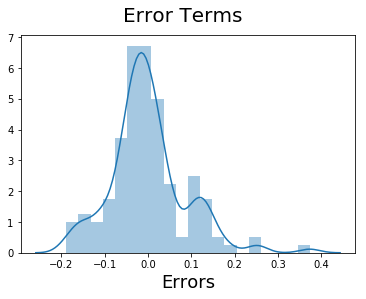

In [311]:
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)            

In [312]:
car_frame.columns
X.columns

Index(['aspiration', 'six', '2bbl', 'audi', 'bmw', 'buick', 'honda', 'jaguar',
       'porsche'],
      dtype='object')

In [313]:
num_vars = ['symboling','wheelbase','cararea','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','mpg','price']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [314]:
y_test = df_test.pop('price')
X_test = df_test

In [315]:
X_test_m4 = sm.add_constant(X_test)

In [316]:
X_test_m4 = X_test_m4.drop(['symboling', 'fueltype', 'doornumber', 'enginelocation',
       'wheelbase', 'carheight', 'curbweight', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm',
       'cararea', 'mpg', 'hardtop', 'hatchback', 'sedan', 'wagon', 'dohcv',
       'l', 'ohc', 'ohcf', 'ohcv', 'rotor', 'five', 'four', 'three',
       'twelve', 'two', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi',
       'fwd', 'rwd', 'chevrolet', 'dodge',
       'isuzu', 'mazda', 'mercury', 'mitsubishi', 'nissan',
       'peugeot', 'plymouth', 'renault', 'saab', 'subaru', 'toyota','volkswagen', 'volvo'], axis = 1)


In [317]:
y_pred_m4 = lr_53.predict(X_test_m4)

Text(0, 0.5, 'y_pred')

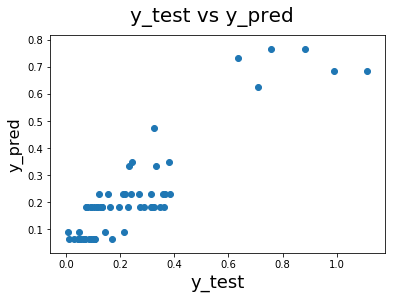

In [318]:
fig = plt.figure()
plt.scatter(y_test, y_pred_m4)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 